# Lab 6: Cost Functions and Parameter Space
## Daniel Leskiewicz
**Introduction**

Within this lab, we are using different cost functions and error. We are also implementing these cost functions to find the best parameters for the models that will fit best for the two models that we are using which are the Gaussian and Linear models. We use grid search to find the best parameters by finding the the minimum cost for the model using grid searches.



a) By looking at the provided cost_functions.py, use 1-2 sentences to describe in detail the 
purpose of each of the methods. To guide this description, discuss the method input, 
method output, and what function each method serves for the cost function.
 - The cost functions take in the parameters such as the features and the true labels. Within the predict methods, we are using the features that we are passing in with the parameters that we are using to then do some sort of arthimetic to predict the y values for each data point. The mse functions for both models, we calculate the mean-squared error between the predicted and true y values. Lastly, the cost function for both of the methods, we calculate the cost functions value for the parameters that we have picked, we predict the features with the parameters and we then calculate the mse cost function value. 

b) For the heatmaps that you generated for this lab, what do they describe? What do the 
“valleys” and “peaks” of this heat map represent?
 - The heatmaps show the error associated with the parameter set of mu and sigma, this is why we see peaks and valleys because the peaks are the paramters that gave us the highest error values while the valleys are the ones that gave us the lowest error values.

c) For experiment 2, you increased the number of samples within the specified range.


a. Describe how the heatmap representation changed due to this increase in 
sampling. 
 - Well increasing the samples, we bascially took the best portion of the heatmap that gave us the lowest error, and more so selected that area to show within the heatmap.


b. What benefit did this higher sampling rate have for finding the set of parameters 
with the minimum error?
 - Well, looking at the values that we have gotten from this heatmap, we get more precise values so therefore we can make a better prediction or just in general get the best parameters for the lowest minimum error.


c. Was this sampling rate high enough? Defend your answer!
 - Well, this more so sounds like a question that we would have to answer depending what we are trying to do with this model(s). We can increase the sample rate to keep getting the best result (parameters) for the model, but this action might not be neseccary all of the time.


d) The Gaussian distribution model is limited to two dimensions while the multivariate linear model 
implemented for this lab is 4 dimensional.


a. Describe a limitation of the grid search method as you add additional dimensions. Hint: 
Think about the time complexity required for the grid search as you add additional 
 - As experienced within this lab, adding in extra dimensions that you add within the grid search most definitely will increase the time complexity.


b. With time complexity in mind, can you derive a rule (mathematical expression) to 
estimate how many grid points are needed to evaluate all combination of parameters 
based on the number of dimensions.
 - Well, the formula that we can use is n^d because we can use the letter n is the number of parameter points and d is the given number of dimensions.


c. With this rule, compare 2-dimensional models with 4-dimensional models. 10-
dimensional? 100-dimensional?
- Well using the rule above it would be given such as, n^2, n^4, n^10, n^100, the numbers being the dimensions. This shows the time complexity. 



e) In experiment 3 you plotted the line of identity in the figure that compared the given response 
variable to the model prediction.


a. What does this line represent and how is it useful?
 - Well, as we can see the line is a mean squared error of 0 so with that information from lecture, the further a point is away the higher the error becomes. 

b. What does it mean for a value to lie above the line? Below the line?
 - Well, if the value is below the lines the value(predicted value) is higher compared to the actual value, and if the value is above the line than the value(predicted value) is lower compared to the actual value. 

c. How would predictions that perfectly replicate the given data appear in this plot?
 - Well, if it's perfectly replicated with the given data and the values are on the line than the predictions are perfectly replicated.

f) What are the weaknesses of grid search? Why wouldn't we want to use it?
 - Well, as seen within this lab, the computation is very expensive and scales expotentially the more dimensions that we introduce. Also, knowing the region where the error is at its lowest is sort of difficult to find so getting and even attempting to use grid search you need to obtain the knowledge of where these points might be on the plane. Like shown in lecture, if we have multiple valleys all over the heatmap and we have to someone adjust and find these valleys effectively, then it becomes a very tedious and intensive process to perform. Also, the accuracy depends on the decimal values when testing these values. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cost_functions import GaussianCostFunction, LinearCostFunction
import time

## Testing Implementation of Cost Functions

In [2]:
!python test_cost_functions.py

......
----------------------------------------------------------------------
Ran 6 tests in 0.047s

OK


## Experiment 1: Coarse Grid Search - Gaussian Distribution 

### 1. Load the gaussdist.cvs into your notebook

In [3]:
gauss_data = np.loadtxt('gaussdist.csv', delimiter=',') 

### 2. Identify the columns associated with the response variables and the feature variable.
The first column in the dataset is the value (feature variable) and the second column is frequency of occurances of that value out of a total of 1.0 which is the response variable

In [4]:
gauss_data[0:5, :]

array([[6.99000000e+00, 1.56842355e-01],
       [8.90000000e+00, 7.89692304e-03],
       [9.58000000e+00, 1.55088416e-03],
       [5.46000000e+00, 3.18990459e-01],
       [1.38000000e+00, 1.39635489e-03]])

## 3. The features and response variables should be stored in seperate numpy arrays

In [5]:
gaussdata_features = gauss_data[:,0]
gaussdata_response = gauss_data[:,1]

## Instantiate your cost function class for GaussianCostFunction using the provided data.

In [6]:
gauss_cost_function = GaussianCostFunction(gaussdata_features, gaussdata_response)

Text(0.5, 1.0, 'Gaussian Frequency vs. Value')

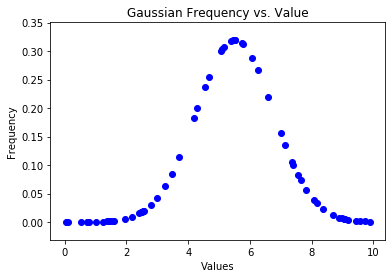

In [7]:
plt.scatter(gaussdata_features, gaussdata_response, color='b')
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Gaussian Frequency vs. Value")

### Use the parameter set (u = 1 and sigma = 0.75) and the _predict method to generate your model predictions and plot them on them same plot as the original data

Text(0.5, 1.0, 'Gaussian Frequency vs. Value')

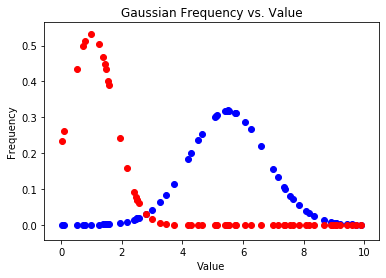

In [8]:
pred_y = gauss_cost_function.predict(gaussdata_features, (1, .75))
plt.scatter(gaussdata_features, gaussdata_response, color='b')
plt.scatter(gaussdata_features, pred_y, color='r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Gaussian Frequency vs. Value')

## Use the cost method to solve for the error and add this error to the plots title

Text(0.5, 1.0, 'Guassian Frequency vs. Values. MSE:0.06242')

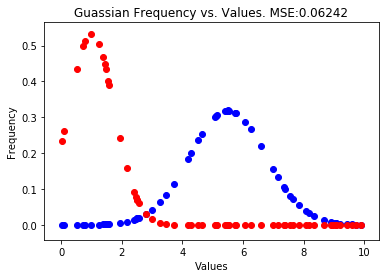

In [9]:
cost_value = gauss_cost_function.cost((1, .75))
plt.scatter(gaussdata_features, gaussdata_response, color='b')
plt.scatter(gaussdata_features, pred_y, color='r')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Guassian Frequency vs. Values. MSE:' + str(round(cost_value, 5)))

## Grid Search - Coarse

### 1. Create two new vectors that hold a set of values for each parameter
### 2. The set of values shoule be evenly spaced.
(Both are shown below)

In [10]:
mu = np.linspace(0, 10, 100)
sigma = np.linspace(.5,2,50)
xx, yy = np.meshgrid(mu, sigma)
stack = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
error = np.zeros(xx.size)
#rounding the values with the loops and getting the error and costs.
for i in range(mu.size):
    mu[i] = np.round(mu[i], 3)
for j in range(sigma.size):
    sigma[j] = np.round(sigma[j], 3)
for k in range(error.size):
    error[k] = gauss_cost_function.cost(stack[k])
error = error.reshape(xx.shape)

### 3. Plot the result using a heatmap

Text(33.0, 0.5, 'sigma')

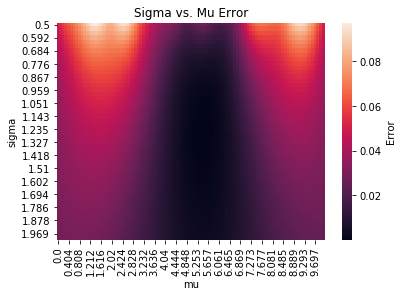

In [11]:
#created a dataframe to get the heatmap to show locxal minimums and maximums
dataframe = pd.DataFrame(data=error, columns=mu, index=sigma)
sns.heatmap(dataframe, cbar_kws={'label': 'Error'})
plt.title('Sigma vs. Mu Error')
plt.xlabel('mu')
plt.ylabel('sigma')

### 4. Using the results, pick a combination of parameters that produce a low error.

In [12]:
cost_values_low_error = gauss_cost_function.cost((5.5, 1.27))
print('Error for mu=5.5, sigma=1.27: ' + str(cost_values_low_error))

Error for mu=5.5, sigma=1.27: 5.024449401600481e-06


### 5. Use the selected parameters to calculate your model predictions and plot this output against the given data on a separate plot

Text(0, 0.5, 'Frequency')

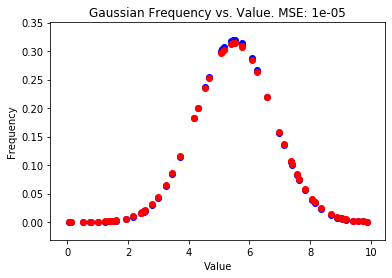

In [13]:
prediction_y = gauss_cost_function.predict(gaussdata_features, (5.5, 1.27))
plt.scatter(gaussdata_features, gaussdata_response, color='b')
plt.scatter(gaussdata_features, prediction_y, color='r')
plt.title('Gaussian Frequency vs. Value. MSE: ' + str(round(cost_values_low_error,5)))
plt.xlabel('Value')
plt.ylabel('Frequency')

## Experiment 2: Refined Grid Search - Gaussian Distribution

### Grid Search - Refinement Pass

### 1. Repeat the steps in Grid Search - Coarse using the same number of grid samples but using 5 -> 6 mu and 1 -> 1.75 sigma.

In [14]:
mu = np.linspace(5, 6, 100)
sigma = np.linspace(1,1.75,50)
xx, yy = np.meshgrid(mu, sigma)
stack = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
error = np.zeros(xx.size)
#recreated the loops to round the numbers and ge the cost for the function and place that within the error
for i in range(mu.size):
    mu[i] = np.round(mu[i], 4)
for j in range(sigma.size):
    sigma[j] = np.round(sigma[j], 4)
for k in range(error.size):
    error[k] = gauss_cost_function.cost(stack[k])
error = error.reshape(xx.shape)

### 2. Plot the result of the 2-dimensional array of error values using a heatmap, pick a combination of parameters that produce a low error.

Text(33.0, 0.5, 'sigma')

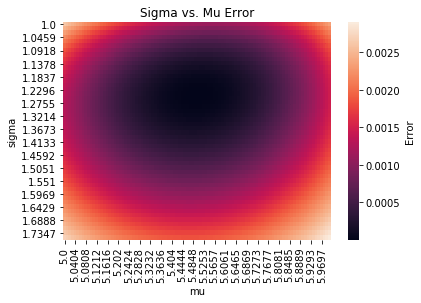

In [15]:
#reated a datagrame with the data and mu,sigma to then see local minimum and maximum to see errors and etc
dataframe = pd.DataFrame(data=error, columns=mu, index=sigma)
sns.heatmap(dataframe, cbar_kws={'label': 'Error'})
plt.title('Sigma vs. Mu Error')
plt.xlabel('mu')
plt.ylabel('sigma')

In [16]:
cost_of_low_error = gauss_cost_function.cost((5.485, 1.276))
print('Error for mu=5.458, sigma=1.276: ' + str((cost_of_low_error)))

Error for mu=5.458, sigma=1.276: 9.028286276230896e-06


### 3. Use the selected parameters to calculate your model predictions and plot this output against the given data on a separate plot.

Text(0, 0.5, 'Frequency')

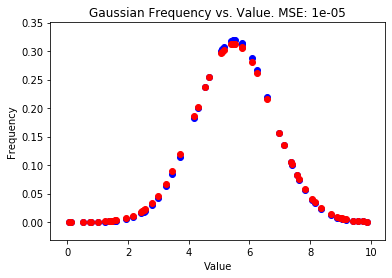

In [17]:
prediction_y = gauss_cost_function.predict(gaussdata_features, (5.485, 1.276))
plt.scatter(gaussdata_features, gaussdata_response, color='b')
plt.scatter(gaussdata_features, prediction_y, color='r')
plt.title('Gaussian Frequency vs. Value. MSE: ' + str(round(cost_values_low_error,5)))
plt.xlabel('Value')
plt.ylabel('Frequency')

### 4. Use the argmin function in numpy, search through the 2-dimensional array of errror values to find the minimum.

In [18]:
mu = np.linspace(5,6,100)
sigma = np.linspace(1,1.75,50)
arg = np.unravel_index(np.argmin(error), error.shape)
p = np.asarray([sigma[arg[0]], [mu[arg[1]]]])

In [19]:
print("Minimum error in the parameter space: " + str(error[arg]))

Minimum error in the parameter space: 4.3307051270672713e-07


In [20]:
print("The parameters for signma and mu are : "  + str(p[0]) + ", " + str(p[1]))

The parameters for signma and mu are : 1.2448979591836735, [5.505050505050505]


## Experiment 3: "Blind" Grid Search - Multivariate Linear Model

### Loading in the advertising dataset

In [21]:
ad_data = np.loadtxt('advertising.csv', delimiter=',', skiprows=1)

In [22]:
#showing the columns of all of the ones in the data
ad_data[0:5,:]

array([[  1. ,   1. , 230.1,  37.8,  69.2,  22.1],
       [  2. ,   1. ,  44.5,  39.3,  45.1,  10.4],
       [  3. ,   1. ,  17.2,  45.9,  69.3,   9.3],
       [  4. ,   1. , 151.5,  41.3,  58.5,  18.5],
       [  5. ,   1. , 180.8,  10.8,  58.4,  12.9]])

Similar to Experiment 1, we are storing these features and response variables in numpy arrays

In [23]:
#splitting the data of features and response
ad_data_features = ad_data[:,1:5]
sales = ad_data[:,5]

### Instantiate the cost function that you created this week for the linear model

In [24]:
ad_data_cost = LinearCostFunction(ad_data_features, sales)

### Instead of plotting features versus response, plot model prediction versus response using  a parameter set of [β0, β1, β2, β3] as [0.1, 0.1, 0.1, 0.1]. On this same figure, plot the line of  identity. The line of identity begins at the origin and has a slope = 1

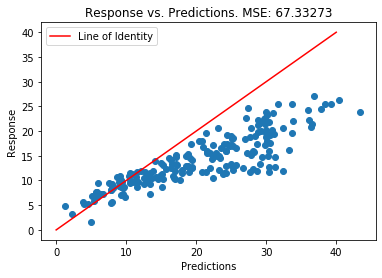

In [25]:
ad_data_pred = ad_data_cost.predict(ad_data_features, np.asarray([.1,.1,.1,.1]))
ad_data_mse = ad_data_cost.cost(np.asarray([.1,.1,.1,.1]))
ls = np.linspace(0,40,2)
plt.scatter(ad_data_pred, sales)
plt.plot(ls, ls, c='r', label='Line of Identity')
plt.title('Response vs. Predictions. MSE: ' + str(round(ad_data_mse,5)))
plt.xlabel('Predictions')
plt.ylabel('Response')
plt.legend()

### Preform a grid search over all four coefficients (β0, β1, β2, β3)

In [26]:
%%time
ls = np.linspace(-1,1,50)
x, y, z, b = np.meshgrid(ls,ls,ls,ls)
stack = np.hstack([x.reshape(-1,1), y.reshape(-1,1,), z.reshape(-1,1), b.reshape(-1,1)])
error = np.zeros(x.size)
for i in range(error.size):
    error[i] = ad_data_cost.cost(stack[i])

CPU times: user 1min 12s, sys: 319 ms, total: 1min 12s
Wall time: 1min 12s


### Now we find the combination of model parameters that yeild us the lowest possible error.

In [27]:
error =  error.reshape(x.shape)
arg = np.unravel_index(np.argmin(error), error.shape)
#for some reason when switching these values around these are the best error values for the heatmap .. ask Dr.Bukowy
params = (ls[arg[1]], ls[arg[0]], ls[arg[2]], ls[arg[3]])

In [28]:
print("Minimum error in the parameter space: " + str(error[arg]))

Minimum error in the parameter space: 4.7953431486880085


In [29]:
print("The parameters for B0, B1, B2, B3: "  + str(params))

The parameters for B0, B1, B2, B3: (0.1428571428571428, 0.06122448979591821, 0.18367346938775508, 0.020408163265306145)


### Now we plot these model parameters  predictions vs the responses

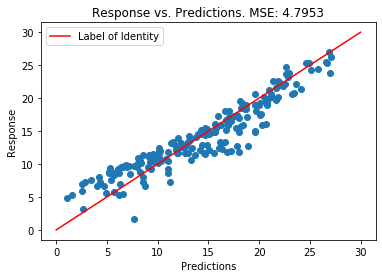

In [30]:
ad_data_pred = ad_data_cost.predict(ad_data_features, params)
ad_data_mse = ad_data_cost.cost(params)
ls = np.linspace(0,30,2)
plt.scatter(ad_data_pred, sales)
plt.plot(ls, ls, c='r', label='Label of Identity')
plt.title('Response vs. Predictions. MSE: ' + str(round(ad_data_mse,4)))
plt.xlabel('Predictions')
plt.ylabel('Response')
plt.legend()